0 background
1 為車流停車 stop 4 congestion
2 停紅綠燈 stop 4 light
3 為行人停車 stop 4 pedestrian
4 為路標停車 stop 4 sign
5 避免撞到路面使用者 Avoid TP
6 穿過十字路口 intersection passing
7 右轉 right turn
8 左轉 left turn
9 左邊分支 left lane branch
10 穿過人行道 crosswalk passing
11 切右道 right lane change
12 切左道 left lane change
13 併道 merge
14 穿過鐵路 railroad passing
15 右邊分支 right lane branch
16 為其他事件停車 Stop for others
17 U轉 U-turn
[0, 2, 6, 7, 8, 9, 12, 13, 15]
Unique labels:  9
[u'\u505c\u7d05\u7da0\u71c8 stop 4 light', u'\u7a7f\u904e\u5341\u5b57\u8def\u53e3 intersection passing', u'\u53f3\u8f49 right turn', u'\u5de6\u8f49 left turn', u'\u5de6\u908a\u5206\u652f left lane branch', u'\u5207\u5de6\u9053 left lane change', u'\u4f75\u9053 merge', u'\u53f3\u908a\u5206\u652f right lane branch']


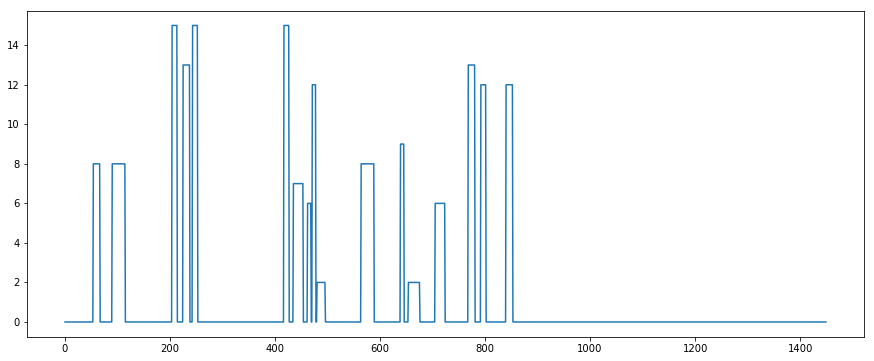

In [49]:
import pickle
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

name = 'pred_cross_mt15_np1_nh500'

result_root = '../result/kmeans_'+name
annotation_root = '../annotation/'
video_root = '../camera/'
#session_id = '201704151140'
session_id = '201704150933'

label_dict= pickle.load(open(os.path.join(annotation_root, 'num2label.pkl'), 'r'))
for i in range(len(label_dict.keys())):
    print i, label_dict[i]


gt = pickle.load(open(os.path.join(annotation_root, session_id+'/annotations.pkl'), 'r'))
#temporary operation, join two labels
gt = np.max(gt, axis=1)

label_list = list(set(gt.tolist()))
print label_list
print "Unique labels: ", len(label_list)

class_names = []
for i in range(1, len(label_dict.keys())):    # except background
    if i in label_list:
        class_names.append(label_dict[i])
print class_names

plt.figure('Ground truth', figsize=(15, 6))
plt.plot(gt)
plt.show()


8


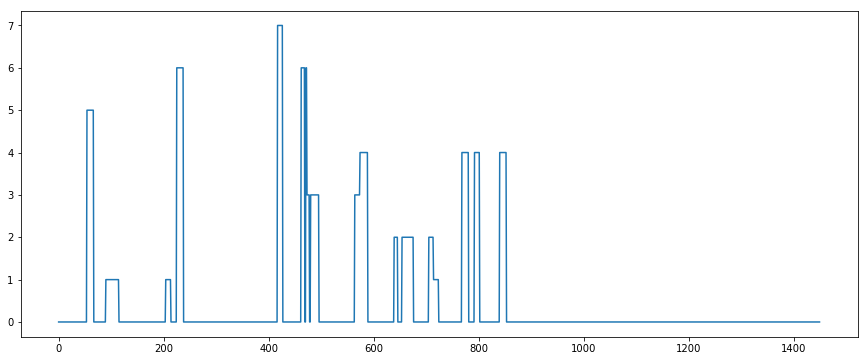

In [51]:
from sklearn.cluster import KMeans
import h5py

fin = h5py.File(os.path.join(video_root, "{0}/{1}.h5").format(session_id,name), 'r')
feat = fin['feats'][:]

for_index = np.where(gt>0)[0]
for_feat = feat[for_index]
for_gt = gt[for_index]

K = len(set(gt_list)) - 1   # no background
print K
for_result = KMeans(n_clusters=K).fit_predict(for_feat)
result = np.zeros(gt.shape)
result[for_index] = for_result

plt.figure('Result', figsize=(15, 6))
plt.plot(result)
plt.show()

In [35]:
def genConMatrix(gt, result):
    """
    Generate the confusion matrix of two segmentations

    Input
        gt   -   ground truth segmentation, vector with size N
        result - cluster result segmentation, vector with size N

    Output
        C    -   the confusion matrix (class by class), size k1 x k2
    """

    s1, G1 = convert_seg(gt)
    s2, G2 = convert_seg(result)

    print "Number of segments of gt: ", len(s1)
    print "Number of segments of result: ", len(s2)

    C = np.zeros((np.max(gt)+1, np.max(result)+1), dtype='int32')
    for i in range(len(s1)-1):
        for j in range(len(s2)-1):
            a = max(s1[i], s2[j])
            b = min(s1[i+1], s2[j+1])

            if a < b:
                C[G1[i], G2[j]] += b - a

    return C


def convert_seg(seg, k=0):
    """
    Convert original segmentation vector

    Input
        seg    -   original segmentation vector with size N

    Output
        s  -  starting position of each segment, list with size m+1, m is the number of segment
        G  -  label of each segment, list with size m 
    """

    if k == 0:
        k = np.max(seg) + 1

    N = seg.shape[0]

    s = [0]
    G = [seg[0]]
    for i in range(1, N):
        if not seg[i] == seg[i-1]:
            s.append(i)
            G.append(seg[i])
    s.append(N)

    return s, G

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import pickle
import numpy as np
import os

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float')
        for i in range(cm.shape[0]):
            if cm[i].sum() > 0:
                cm[i] /= cm[i].sum()
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Number of segments of gt:  15
Number of segments of result:  13
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0 22 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 10  9  0  0  0  7  0]
 [19  0  0  0  0  0  0  0]
 [ 0 25  0 10 15 13  0  0]
 [ 0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5 23  0  2  0]
 [ 0  0  0  0 13  0 13  0]
 [ 0  0  0  0  0  0  0  0]
 [10 10  0  0  0  0  0 10]]
[ 2  6  7  8  9 12 13 15]
[(2, 0), (3, 1), (5, 4), (0, 3), (4, 5), (6, 6), (7, 7), (1, 2)]
[[0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
[[16 22  0  0  0  0  0  0]
 [ 0  9  0 10  0  0  7  0]
 [ 0  0 19  0  0  0  0  0]
 [10  0  0 25 13 15  0  0]
 [ 0  7  0  0  0  0  0  0]
 [ 5  0  0  0  0 23  2  0]
 [ 0  0  0  0  0 13 13  0]
 [ 0  0 10 10  0  0  0 10]]
Normalized confusion matrix


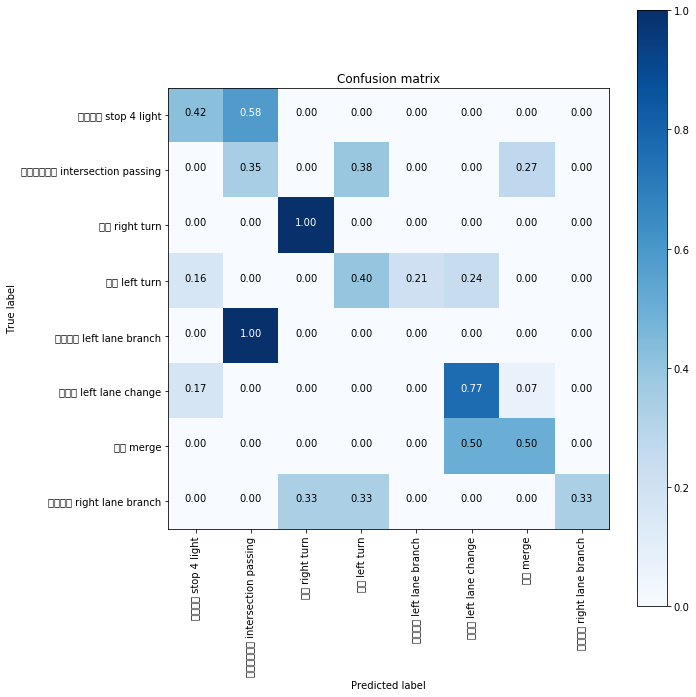

In [55]:
import sys
sys.path.append('/home/xyang/UTS/3rd-party/hungarian-algorithm')
from hungarian import Hungarian

# compute the confusion matrix
C0 = genConMatrix(for_gt, for_result)
print C0

# remove the null classes
index = np.where(C0.sum(axis=1) > 0)[0]
C1 = C0[index]
print index

# hungarian algorithm
h = Hungarian(C1.tolist(), is_profit_matrix=True)
h.calculate()

ass = h.get_results()
print ass
P = np.zeros(C1.shape, dtype='int')
for i in range(len(ass)):
    row = ass[i][0]
    col = ass[i][1]
    P[row, col] = 1
print P

C = C1.dot(P.T)
print C

plt.figure(figsize=(10, 10))
plot_confusion_matrix(C, classes=class_names, normalize=True)
plt.show()

In [53]:
# Evaluation
f1 = []
rec = []
pre = []
for i in range(C.shape[0]):
    c = C[i]
    if c[i] == 0 and np.sum(c)>0:
        f1.append(0)
        rec.append(0)
        pre.append(0)
    elif np.sum(c)>0:
        precision = float(c[i]) / np.sum(C[:,i])
        recall = float(c[i]) / np.sum(c)
        f1.append(2*precision*recall / (precision+recall))
        rec.append(recall)
        pre.append(precision)
            
print "Avg F1-score: %f" % np.mean(np.vstack(f1))
print "Avg Recall: %f" % np.mean(np.vstack(rec))
print "Avg Precision: %f" % np.mean(np.vstack(pre))

for i in range(len(label_list)-1):
    print "Label %d, F1: %f, Recall: %f, Precision: %f" % (label_list[i+1], f1[i], rec[i], pre[i])


Avg F1-score: 0.451152
Avg Recall: 0.470504
Avg Precision: 0.500699
Label 2, F1: 0.463768, Recall: 0.421053, Precision: 0.516129
Label 6, F1: 0.281250, Recall: 0.346154, Precision: 0.236842
Label 7, F1: 0.791667, Recall: 1.000000, Precision: 0.655172
Label 8, F1: 0.462963, Recall: 0.396825, Precision: 0.555556
Label 9, F1: 0.000000, Recall: 0.000000, Precision: 0.000000
Label 12, F1: 0.567901, Recall: 0.766667, Precision: 0.450980
Label 13, F1: 0.541667, Recall: 0.500000, Precision: 0.590909
Label 15, F1: 0.500000, Recall: 0.333333, Precision: 1.000000


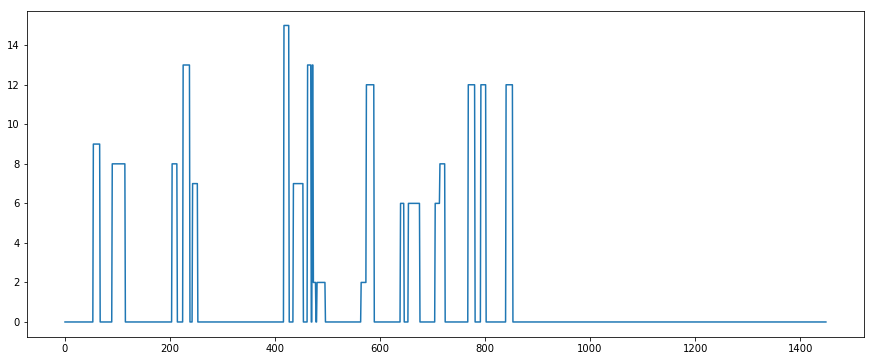

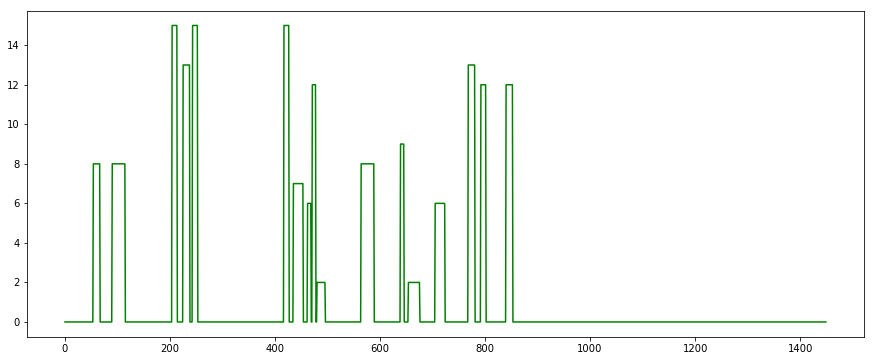

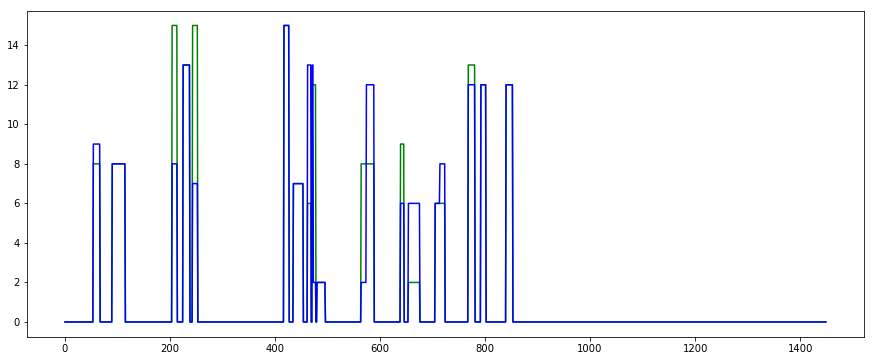

In [54]:
# transform result according to matching

for_result_hungarian = np.zeros(for_result.shape)
for i in range(len(for_result)):
    for_result_hungarian[i] = label_list[int(np.where(P[:,for_result[i]])[0])+1]   # +1 because no background
result_hungarian = np.zeros(result.shape)
result_hungarian[for_index] = for_result_hungarian
    
plt.figure('Result_hungarian', figsize=(15, 6))
plt.plot(result_hungarian)
plt.show() 

# Compare

tmin = 0
tmax = 2500

plt.figure('Ground truth', figsize=(15, 6))
plt.plot(gt, 'g')
plt.show()

plt.figure('Comparison', figsize=(15, 6))
plt.plot(gt[tmin:tmax], 'g')
plt.plot(result_hungarian[tmin:tmax], 'b')
plt.show()